In [64]:
import pandas as pd

df = pd.read_csv("train.csv")

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analisys

# PCLASS

[3 1 2]
3    491
1    216
2    184
Name: Pclass, dtype: int64
0


<AxesSubplot:>

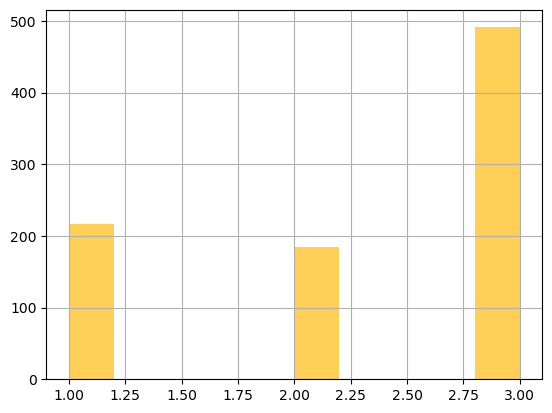

In [66]:
########## PCLASS
print(df.Pclass.unique())
print(df.Pclass.value_counts())
print(df.Pclass.isna().sum())
df.Pclass.hist(color=[ '#FFCF56'])




The PClass column does not have NA. It is a categorical variable with the values 1 2 and 3. It has a lot more values on the 3 value than the other two.

# Sex

['male' 'female']
male      577
female    314
Name: Sex, dtype: int64
0


<AxesSubplot:>

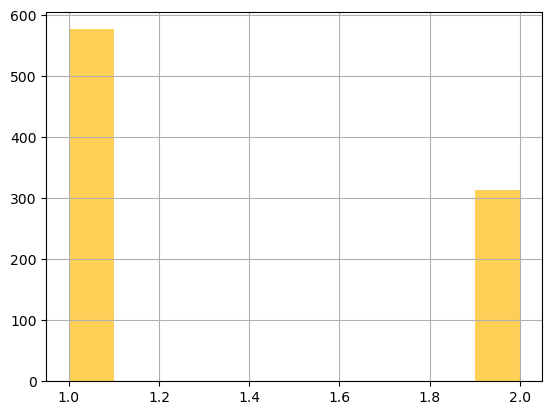

In [67]:
############Sex
print(df.Sex.unique())
print(df.Sex.value_counts())
print(df.Sex.isna().sum())
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=="male" else 2)
df.Sex.hist(color=[ '#FFCF56'])


The sex variable does not contain NA. It was transformed from a string variable ( male, female). The value 1 represents the male passengers and the value 2 the female passengers. We can see there were more male passengers than female passengers.

# Name
Name is a variable that does not provide any type of important information and , thus, will be droped

In [68]:
df.drop("Name", inplace=True,axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S


# Age

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
Number Of NAs
177


<AxesSubplot:>

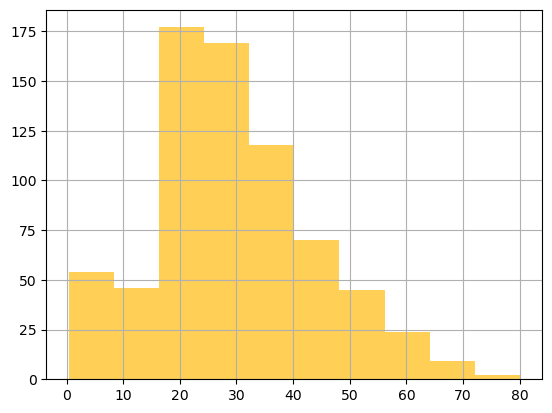

In [69]:
print(df.Age.value_counts())
print("Number Of NAs")
print(df.Age.isna().sum())
df.Age.hist(color=[ '#FFCF56'])



We can notice from the value counts that there are some weird age numbers (really low , less than one) are they babies? I will assume they are and that there is no issue on those values.
Besides that, it it was possible to notice that there are some values where the age is missing. A good assumption for that would be to put them with the mean age of all the other passengers

In [70]:
df.Age.mean()

29.69911764705882

In [71]:
prevAge=df.Age
df.Age=df.Age.fillna(df.Age.mean())
print("Number Of NAs")
print(df.Age.isna().sum())

Number Of NAs
0


<AxesSubplot:ylabel='Frequency'>

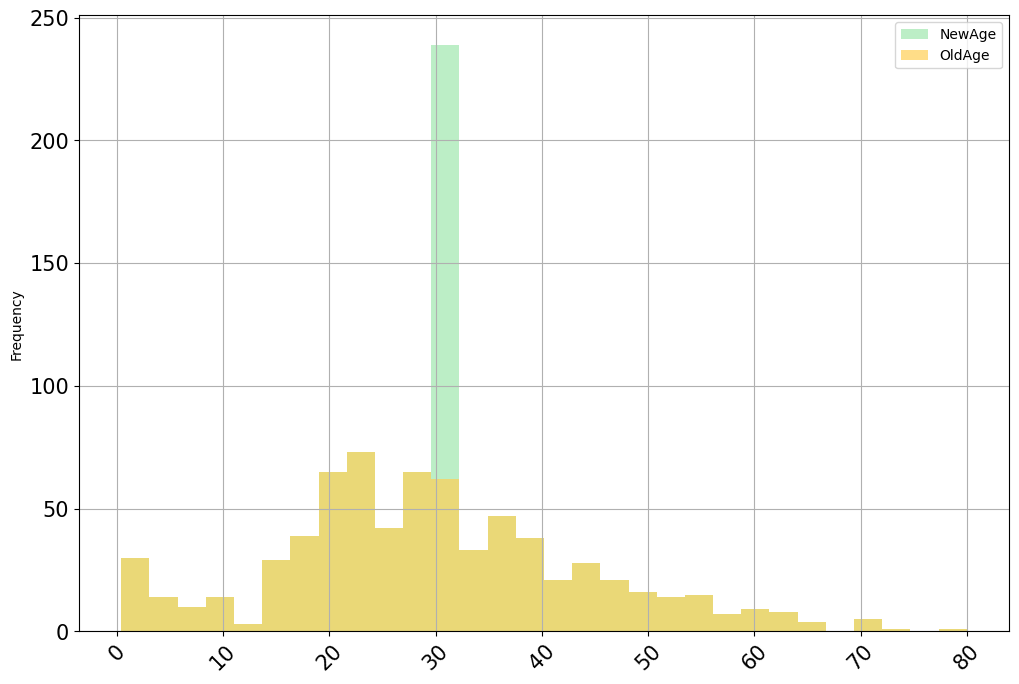

In [72]:
import matplotlib as plt
ageDataframe=pd.DataFrame({'NewAge': df.Age, 'OldAge': prevAge})
ageDataframe.plot(kind='hist',
        alpha=0.7,
        bins=30,
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15, 
        color=['#A0E8AF', '#FFCF56'])


We can now see there was a spike in the 29/30 column because we added the mean (29.7) where the values were missing. We do not have any NAs at the moment. 
Further exploration will be done on this , maybe transforming the value into intervals ([0-10],[11-20], etc.) But first I want to experiment with the values as they are. A remember of what the dataframe looks like at the moment is bellow:

In [73]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S


# SibSp

[1 0 3 4 2 5 8]
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0


<AxesSubplot:>

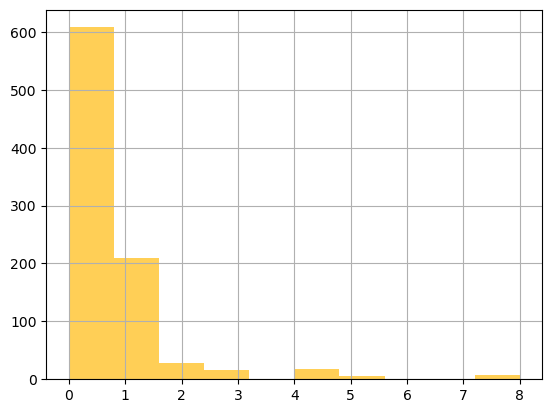

In [75]:
########## SibSp
print(df.SibSp.unique())
print(df.SibSp.value_counts())
print(df.SibSp.isna().sum())
df.SibSp.hist(color=[ '#FFCF56'])





This variable represents the number of siblings/spouse one has. We can see most of the people went alone, whereas a big number of them went with either a sibling or the spouse.

# ParCh

[0 1 2 5 3 4 6]
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0


<AxesSubplot:>

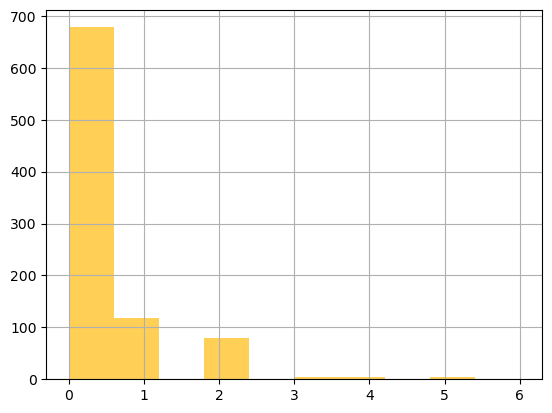

In [76]:
########## SibSp
print(df.Parch.unique())
print(df.Parch.value_counts())
print(df.Parch.isna().sum())
df.Parch.hist(color=[ '#FFCF56'])




This variable represents the number of parents/children one has on the ship. We can see most of the people went alone, whereas a big number of them went with either a parent or a child.

# Combination of Parch and SibSp 

These variables show who were the companions of a person. Thus , we can add a column companions, summing these two.

In [ ]:
df["Companions"]

# Ticket

In [77]:
print(df.Ticket.value_counts())

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


In [ ]:
The ticket number has a lot of sparse values and seems to not have any relevance for the model, thus it will be removed

In [78]:
df.drop("Ticket", inplace=True,axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,S
1,2,1,1,2,38.0,1,0,71.2833,C85,C
2,3,1,3,2,26.0,0,0,7.9250,NaN,S
3,4,1,1,2,35.0,1,0,53.1000,C123,S
4,5,0,3,1,35.0,0,0,8.0500,NaN,S


# Fare

In [79]:
print(df.Fare.value_counts())

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


This variable is probably related with the class the people chose to be in, thus we are going to check its correlation

In [80]:
df['Fare'].corr(df['Pclass'])

-0.5494996199439081

These variables have a negative correlation, which means that, the higher the value in one , lower the value in two. Being Pclas s a variable with the highest class in 1, this makes sense and means they are correlated. This value probably also correlates with the number of people in the room. Possibly going to be removed in the future.